## 📘 Telco Customer Churn Analysis

## 📌 1. Introduction
Business Context:
Telecommunication companies face high customer churn, which directly impacts revenue. Understanding the key factors behind customer churn can help build proactive retention strategies.

Objective:
Analyze customer data to identify trends and behaviors that contribute to churn. Engineer new features to help uncover deeper insights and lay the groundwork for predictive modeling.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = pd.read_csv("Telco-Customer-Churn.csv")  
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [89]:
df.shape

(7043, 21)

In [91]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [93]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [95]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [97]:
df.drop(columns=['customerID'], inplace = True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [53]:
## The 'TotalCharges' column had some non-numeric entries stored as strings. 
## So converting them using pd.to_numeric and replacing invalid entries with NaN. 
## Then, filling those missing values with the median to avoid skewing the data and preserve central tendency

In [99]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [101]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [103]:
## Understanding target variable - Churn 
## Helps to see how many customers churned vs stayed 

Text(0.5, 1.0, 'Churn Distribution')

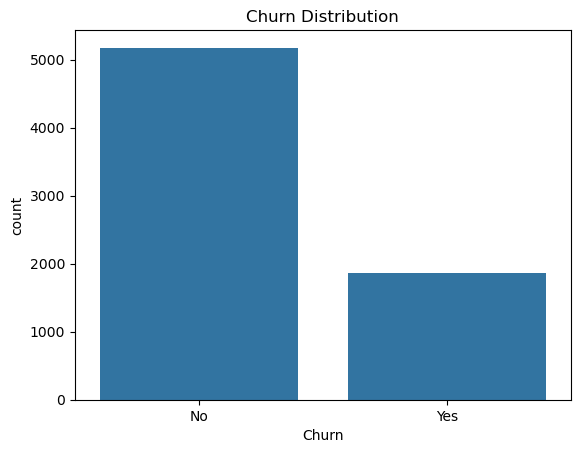

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")

In [71]:
## Univarite analysis

Text(0.5, 1.0, 'Monthly Charges Distribution')

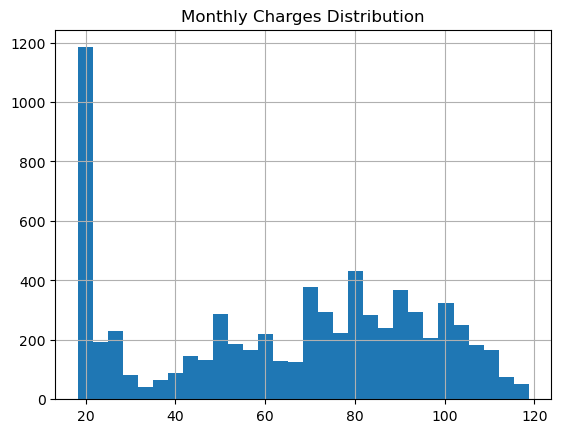

In [107]:
df['MonthlyCharges'].hist(bins=30)
plt.title("Monthly Charges Distribution")

In [75]:
## Categorical features

<Axes: xlabel='Contract', ylabel='count'>

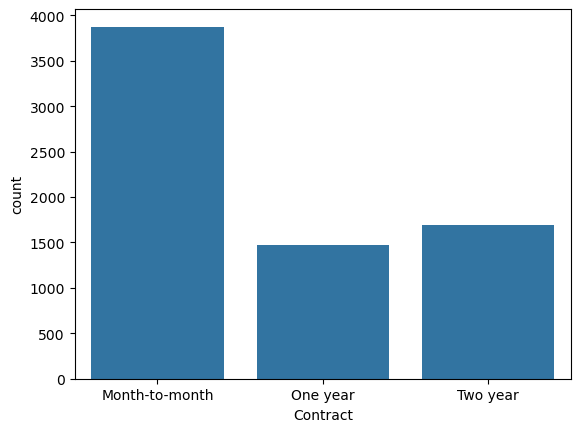

In [109]:
sns.countplot(x='Contract', data=df)

In [111]:
## Analysis - Most customers are on month-to-month contracts, which are more prone to churn

In [113]:
## Bivarite analysis

<Axes: xlabel='Contract', ylabel='count'>

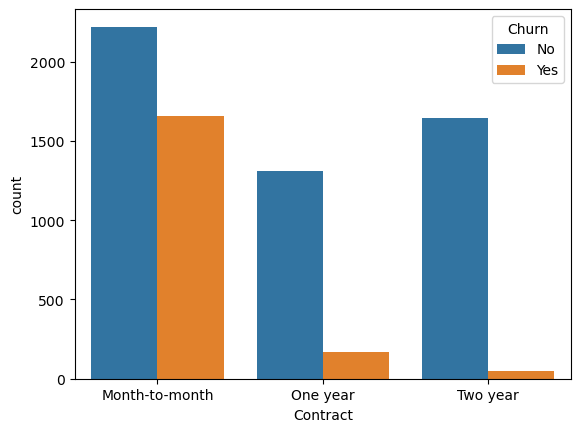

In [115]:
sns.countplot(x='Contract', hue='Churn', data=df)

In [117]:
## Analysis - Customers with month-to-month contracts churn significantly more than those on yearly contracts

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

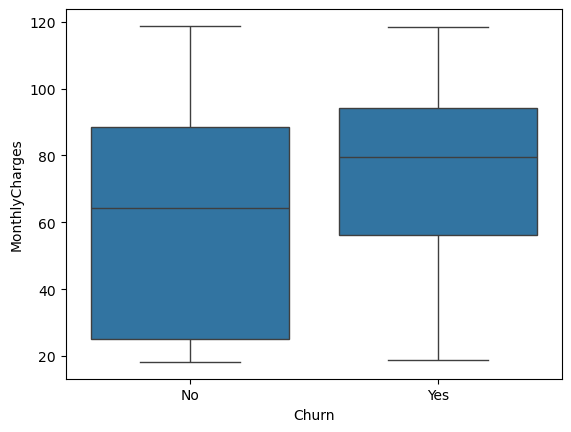

In [119]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

In [121]:
##  churned customers have higher monthly charges.

<Axes: >

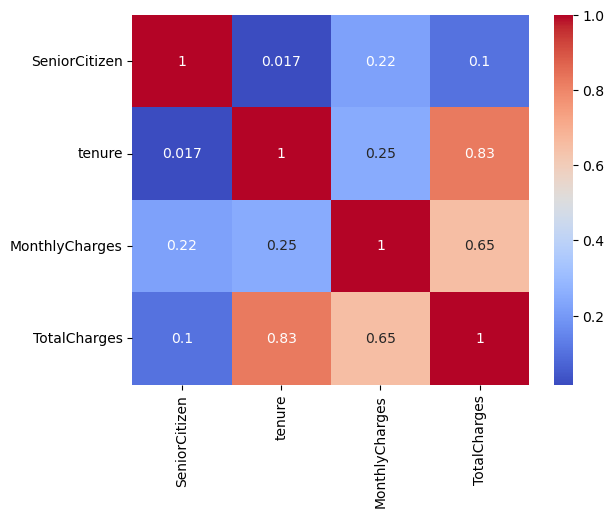

In [125]:
## Used df.select_dtypes() to isolate numeric features before applying correlation analysis to avoid errors due to categorical variables. 
## Also used numeric_only=True with df.corr() as a clean approach compatible with newer pandas versions.
import seaborn as sns
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

In [127]:
## Analysis - Tenure and TotalCharges are highly correlated, which makes sense since longer tenure usually means higher charges.

<Axes: xlabel='tenure', ylabel='Count'>

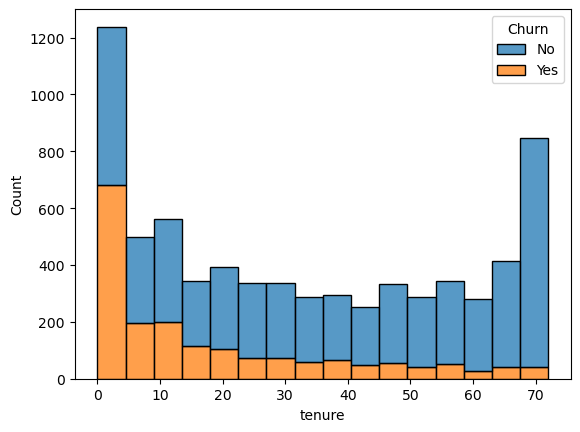

In [131]:
## Churn by tenure: Trend
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack')

In [133]:
## Analysis - Customers tend to churn early in their tenure, especially in the first few months.

#### EDA Conclusion - 
* performed EDA using visualizations like histograms, boxplots, and countplots to identify key patterns.
* For instance, it was found that customers with month-to-month contracts and higher monthly charges are more likely to churn, also used a correlation matrix to detect multicollinearity.

#### Feature Engineering
- Raw data may not always express the underlying patterns clearly.
- Models often struggle with raw numerical columns or long continuous variables like `tenure` or `total charges`.
- We want to **highlight customer behavior** that may signal potential churn, such as:
  - How long they’ve been with the company
  - How much they are paying each month
  - If their behavior fits a risky pattern (e.g., new customer paying high charges)

In [157]:
# 1. Average Charges Per Month: TotalCharges / Tenure
# Helps normalize spending across time
df['AvgChargesPerMonth'] = df['TotalCharges'] / df['tenure'].replace(0, 1)

In [161]:
# 2. Bin Tenure into Lifecycle Stages
# Helps capture loyalty stage: New, Mid-term, Long-term
def tenure_category(tenure):
    if tenure <= 12:
        return 'New'
    elif tenure <= 36:
        return 'Mid-term'
    else:
        return 'Long-term'

df['TenureGroup'] = df['tenure'].apply(tenure_category)
df['TenureGroup'] = df['TenureGroup'].astype('category')

In [163]:
# 3. High-Risk Customer Flag
# Flags users with high charges but low tenure (likely to churn)
median_avg = df['AvgChargesPerMonth'].median()
df['HighRiskCustomer'] = ((df['AvgChargesPerMonth'] > median_avg) & (df['tenure'] < 12)).astype(int)

In [165]:
# 4. View counts to validate
print(df[['AvgChargesPerMonth', 'TenureGroup', 'HighRiskCustomer']].head())

   AvgChargesPerMonth TenureGroup  HighRiskCustomer
0           29.850000         New                 0
1           55.573529    Mid-term                 0
2           54.075000         New                 0
3           40.905556   Long-term                 0
4           75.825000         New                 1


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   gender              7043 non-null   object  
 1   SeniorCitizen       7043 non-null   int64   
 2   Partner             7043 non-null   object  
 3   Dependents          7043 non-null   object  
 4   tenure              7043 non-null   int64   
 5   PhoneService        7043 non-null   object  
 6   MultipleLines       7043 non-null   object  
 7   InternetService     7043 non-null   object  
 8   OnlineSecurity      7043 non-null   object  
 9   OnlineBackup        7043 non-null   object  
 10  DeviceProtection    7043 non-null   object  
 11  TechSupport         7043 non-null   object  
 12  StreamingTV         7043 non-null   object  
 13  StreamingMovies     7043 non-null   object  
 14  Contract            7043 non-null   object  
 15  PaperlessBilling    7043 non-null   ob

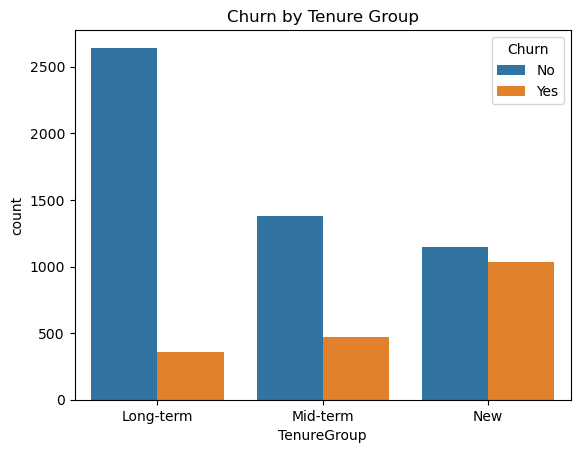

In [169]:
# 5. (Optional) See how new features relate to Churn
import seaborn as sns
import matplotlib.pyplot as plt

# Tenure Group vs Churn
sns.countplot(x='TenureGroup', hue='Churn', data=df)
plt.title("Churn by Tenure Group")
plt.show()

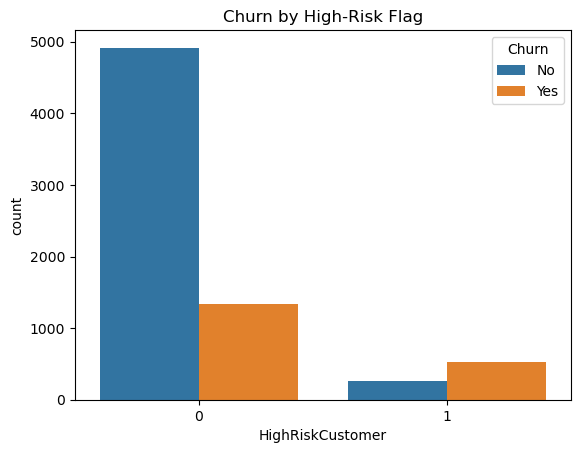

In [173]:
# HighRiskCustomer vs Churn
sns.countplot(x='HighRiskCustomer', hue='Churn', data=df)
plt.title("Churn by High-Risk Flag")
plt.show()

### ---------------------------------------------
## ✅ 5. Conclusion
### ---------------------------------------------

Conducted a full analysis on the Telco Customer Churn dataset:

1. Cleaned data types and handled missing values.
2. Performed EDA to identify important churn patterns.
3. Engineered meaningful features like average monthly charges, tenure groups, and a high-risk customer flag.

Key Insights:
- Customers with month-to-month contracts churn more.
- Short-tenured customers paying high monthly charges are at risk.
- Fiber optic internet users showed higher churn rates.

Business Value:
The insights help the company target at-risk segments with personalized retention strategies, optimize pricing, and improve customer lifetime value.

